IMPORTING USEFUL LIBRARIES:-

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import openpyxl
%matplotlib inline

Now its time to import the dataset using pandas library:-

In [309]:
df=pd.read_csv('train.csv')
y=pd.read_csv('test.csv')

Lets get a glimpse of these datasets using the head() attribute in pandas library:-

In [256]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [257]:
y.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Lets look at the various features that are present in our dataframe:-

In [258]:
print(df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


Now we can look at what sort of data (datatypes) these features store:-

In [259]:
print(df.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


HomePlanet , CryoSleep , Cabin, Name, Transported, Destination and VIP can be classified as "Categorical features" as their info is aggregated into groups rather than being in Numeric values.
Similiarly Age, RoomService , FoodCourt , ShoppingMall , Spa and VRDECK are classified as "Numeric features"

Shape of our dataframe:-

In [260]:
print(df.shape)

(8693, 14)


We can also get other information about the dataframe using the describe() function in pandas

In [261]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Lets see the unique groups our categorical features are seggregated in:-

In [262]:
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + '-')
        print(df[col].unique())
        print("Number of unique groups-",df[col].unique().shape)

PassengerId-
['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
Number of unique groups- (8693,)
HomePlanet-
['Europa' 'Earth' 'Mars' nan]
Number of unique groups- (4,)
CryoSleep-
[False True nan]
Number of unique groups- (3,)
Cabin-
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Number of unique groups- (6561,)
Destination-
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Number of unique groups- (4,)
VIP-
[False True nan]
Number of unique groups- (3,)
Name-
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']
Number of unique groups- (8474,)


Time to plot some graphs:

Citations-
https://www.geeksforgeeks.org/matplotlib-pyplot-title-in-python/
https://www.youtube.com/watch?v=wggJ_JSxY0M
https://www.statology.org/seaborn-subplots/#:~:text=You%20can%20use%20the%20following,%5B0%2C0%5D)%20sns.


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

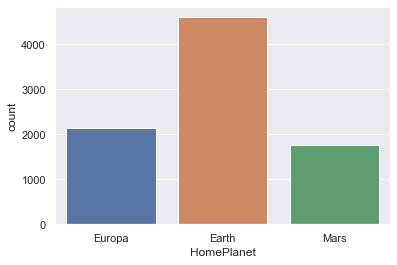

In [263]:
sns.countplot(x='HomePlanet',data=df)

This shows that almost half of the passengers are from Earth followed by Europa and Mars.

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

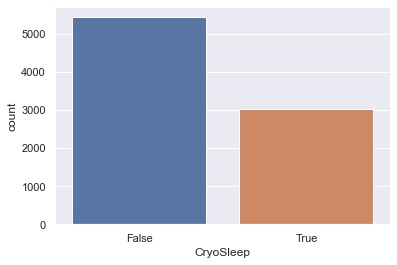

In [264]:
sns.countplot(x='CryoSleep',data=df)

Only about 1/3rd of the passengers have opted for cryosleep.

<AxesSubplot:xlabel='Destination', ylabel='count'>

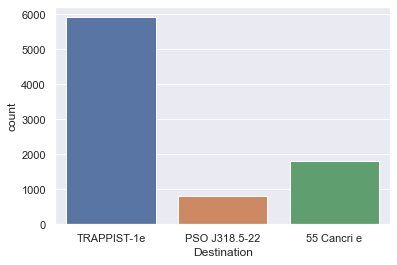

In [265]:
sns.countplot(x='Destination',data=df)

<AxesSubplot:xlabel='VIP', ylabel='count'>

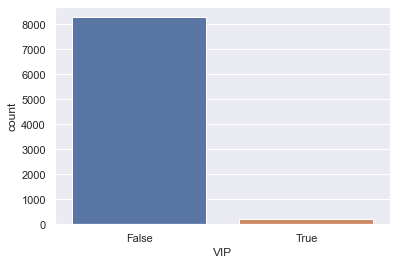

In [266]:
sns.countplot(x='VIP',data=df)

As expected very few passengers are under the VIP category.

<AxesSubplot:xlabel='Transported', ylabel='count'>

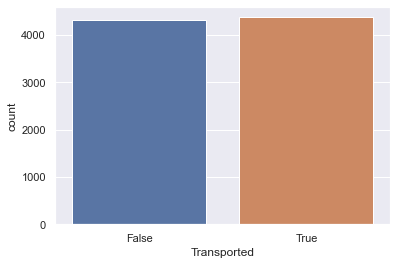

In [267]:
sns.countplot(x='Transported',data=df)

This shows that almost half of the passengers were transported while the other half weren't.

<AxesSubplot:xlabel='VIP', ylabel='count'>

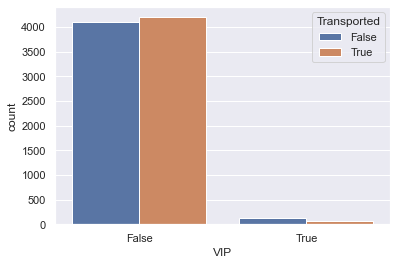

In [268]:
sns.countplot(x='VIP',data=df,hue='Transported')

This shows that there was no such bias between VIPs and non-VIPs when they were transported.

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

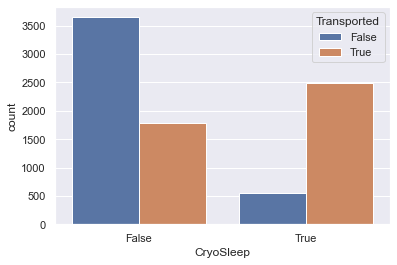

In [269]:
sns.countplot(x='CryoSleep',data=df,hue='Transported')

This shows that a passenger who had opted for cryosleep had much more chances of being transported due to the anomaly.

Lets see the distribution of VIPs and non-VIPs among the people who opted for cryosleep:-

<AxesSubplot:xlabel='VIP', ylabel='count'>

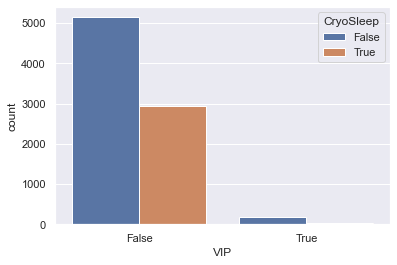

In [270]:
sns.countplot(x='VIP',data=df,hue='CryoSleep')

Almost all of the VIPs did not opt for cryosleep while just about 37.5% of non-VIPs opted for cryosleep.

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

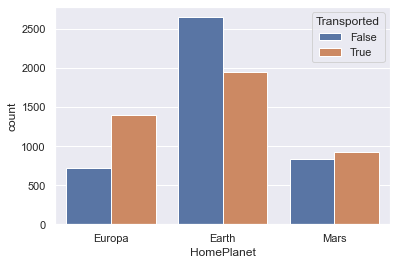

In [271]:
sns.countplot(x='HomePlanet',data=df,hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

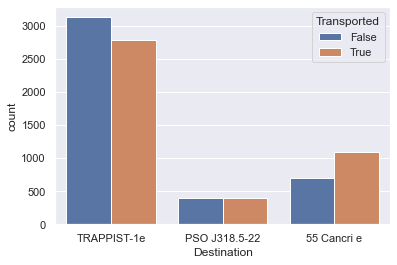

In [272]:
sns.countplot(x='Destination',data=df,hue='Transported')

Lets see the age distribution of the passengers through a histogram:-

<AxesSubplot:xlabel='Age', ylabel='Count'>

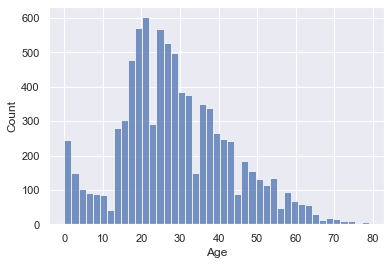

In [273]:
sns.histplot(x='Age',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

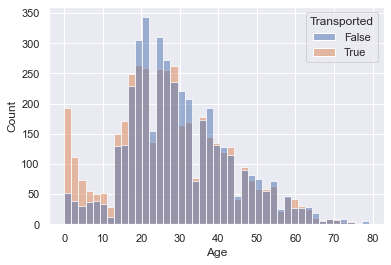

In [274]:
sns.histplot(x='Age',data=df,hue='Transported')

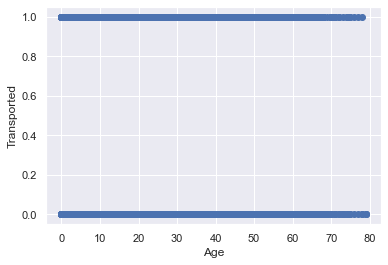

In [275]:
plt.scatter(df['Age'],df['Transported'])
plt.xlabel('Age')
plt.ylabel('Transported')
plt.show()

From the above two graphs we can see that age was not very important in determining whether a passenger was transported or not. The only thing we can say is that passengers who were 15 years or younger had more chances of not being transported while the opposite is true for passengers aged between 20-40 years. 

The Inspiration of following graphs is taken from - https://www.kaggle.com/code/rajkumar125/spaceship-titanic-classification

<AxesSubplot:xlabel='VRDeck'>

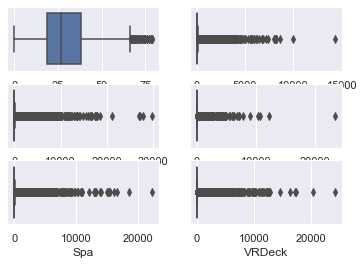

In [276]:
sns.set()
fig,axes=plt.subplots(3,2)
sns.boxplot(x='Age',data=df,ax=axes[0,0])
sns.boxplot(x='RoomService',data=df,ax=axes[0,1])
sns.boxplot(x='FoodCourt',data=df,ax=axes[1,0])
sns.boxplot(x='ShoppingMall',data=df,ax=axes[1,1])
sns.boxplot(x='Spa',data=df,ax=axes[2,0])
sns.boxplot(x='VRDeck',data=df,ax=axes[2,1])

Now lets handle NULL values in our dataframe:-
Citations:-
https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/#:~:text=In%20order%20to%20check%20missing,null%20values%20in%20a%20series.

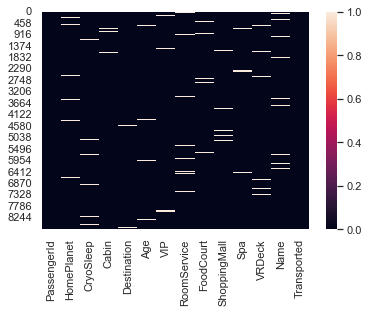

In [277]:
sns.heatmap(df.isnull())
plt.show()

Looks like all of the features except PassengerId have NULL values.

In order to fill the missing values I have used the method of interpolation. This method works really well in this dataframe as we don't have null values in the first row.

In [278]:
df=df.interpolate(method='linear',limit_direction='forward')

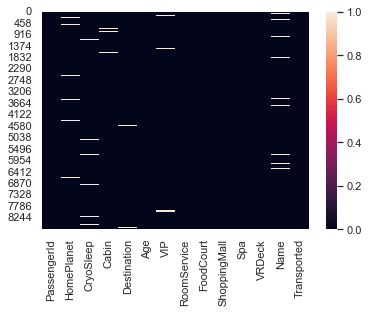

In [279]:
sns.heatmap(df.isnull())
plt.show()

This method has taken care of Null values in Numerical features.
For categorical features I am going to fill the null values with mode of that feature.

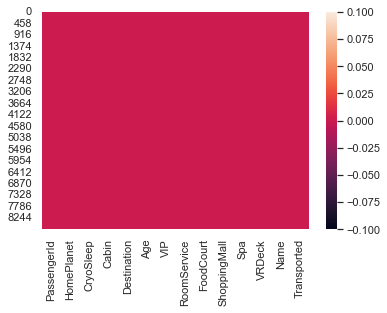

In [280]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])

sns.heatmap(df.isnull())
plt.show()

In [281]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now we need to encode our data for categorical features:-
I am going to drop PassengerID and Name as categorical features as intuitively we know that they don't have any say in classification.
Further I am going to use Label encoding for Cabin , Transported and Hot-Encoding for the remaining features.
Citations-
https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [282]:

df=df.drop(['PassengerId','Name'],axis=1)


In [283]:

label_encoder=preprocessing.LabelEncoder()
df['Cabin']=label_encoder.fit_transform(df['Cabin'])
df['Transported']=label_encoder.fit_transform(df['Transported'])
df=pd.get_dummies(df,columns=['HomePlanet','CryoSleep','Destination','VIP'])
df.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,149,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1,1,0
1,2184,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,0,0,0,1,1,0
2,1,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,0,0,1,0,1
3,1,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,0,0,1,1,0
4,2186,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0,0,1,1,0


In [284]:
features=np.array(df.drop(['Transported'],axis=1))
labels=np.array(df['Transported'])

In [285]:
print(features)
print(' ')
print(labels)
print(features.shape)
print(labels.shape)

[[1.490e+02 3.900e+01 0.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [2.184e+03 2.400e+01 1.090e+02 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.000e+00 5.800e+01 4.300e+01 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [5.285e+03 2.600e+01 0.000e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [2.131e+03 3.200e+01 0.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.131e+03 4.400e+01 1.260e+02 ... 1.000e+00 1.000e+00 0.000e+00]]
 
[0 1 0 ... 1 0 1]
(8693, 17)
(8693,)


Now we need to split the data for training and testing:

In [286]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,train_size=0.8,random_state=42)
print("Size of training feature set is",features_train.shape)
print("Size of training label set is",labels_train.shape)
print("Size of testing feature set is",features_test.shape)
print("Size of testing label set is",labels_test.shape)


Size of training feature set is (6954, 17)
Size of training label set is (6954,)
Size of testing feature set is (1739, 17)
Size of testing label set is (1739,)


Now we are ready for creating and training a model over the above dataset:
I am going to use F1 score as a measure of accuracy of our model
Citations:-
1)https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587
2)https://muthu.co/understanding-the-classification-report-in-sklearn/

Random Forest Classifier:

Citations:-
https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

In [287]:

rf=RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(features_train,labels_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [288]:
prediction=rf.predict(features_test)
print(prediction)
class_report=classification_report(labels_test,prediction)
matrix=confusion_matrix(labels_test,prediction)
print(matrix)
print(class_report)


[0 1 0 ... 0 1 0]
[[712 149]
 [248 630]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       861
           1       0.81      0.72      0.76       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



In [289]:

rfaccuracy=rf.score(features_test,labels_test)
print(rfaccuracy)

0.7717078780908568


K-Nearest Neighbours 
Citations:-
1)https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/

In [290]:
K=[]
training=[]
testing=[]
scores={}
for k in range(20,50):
    model=KNeighborsClassifier(n_neighbors = k)
    model.fit(features_train,labels_train)
    training.append(model.score(features_train,labels_train))
    testing.append(model.score(features_test,labels_test))
    scores[k]=[model.score(features_train,labels_train),model.score(features_test,labels_test)]
    K.append(k)

In [291]:
for key,values in scores.items():
    print(key," : ",values)


20  :  [0.8016968651136037, 0.7625071880391029]
21  :  [0.8015530629853321, 0.7590569292696953]
22  :  [0.8001150417026172, 0.7625071880391029]
23  :  [0.7986770204199022, 0.7613571017826337]
24  :  [0.8019844693701467, 0.7636572742955722]
25  :  [0.7986770204199022, 0.7636572742955722]
26  :  [0.8008340523439746, 0.7665324899367453]
27  :  [0.7973828012654587, 0.7671075330649799]
28  :  [0.7986770204199022, 0.7682576193214491]
29  :  [0.7945067587000287, 0.7694077055779184]
30  :  [0.7955133735979293, 0.7688326624496837]
31  :  [0.7927811331607708, 0.7711328349626222]
32  :  [0.7943629565717573, 0.765382403680276]
33  :  [0.7946505608283002, 0.7659574468085106]
34  :  [0.7940753523152143, 0.7625071880391029]
35  :  [0.7929249352890423, 0.7642323174238068]
36  :  [0.7919183203911417, 0.7602070155261644]
37  :  [0.7917745182628703, 0.7642323174238068]
38  :  [0.7923497267759563, 0.7584818861414606]
39  :  [0.7896174863387978, 0.7619321449108684]
40  :  [0.7900488927236123, 0.75733179988

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


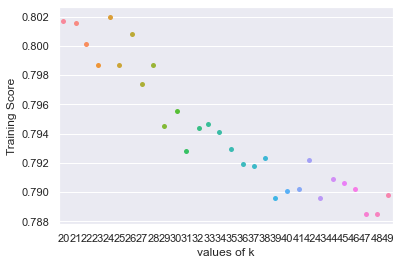

In [292]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


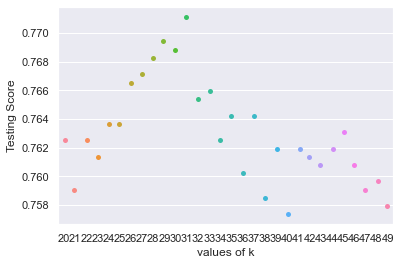

In [293]:
ax = sns.stripplot(K, testing);
ax.set(xlabel ='values of k', ylabel ='Testing Score')  
  
plt.show()

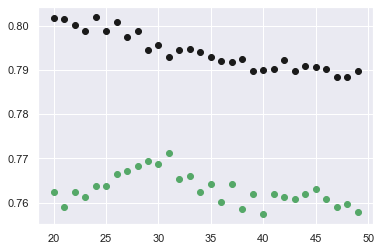

In [294]:
plt.scatter(K, training, color ='k')
plt.scatter(K, testing, color ='g')
plt.show()

This shows that the best value of k is 31

In [295]:
model=KNeighborsClassifier(n_neighbors=31)
model.fit(features_train,labels_train)


KNeighborsClassifier(n_neighbors=31)

In [296]:
prediction=model.predict(features_test)
print(prediction)

[0 0 1 ... 0 1 0]


In [297]:
prediction=rf.predict(features_test)
print(prediction)
class_report=classification_report(labels_test,prediction)
matrix=confusion_matrix(labels_test,prediction)
print(matrix)
print(class_report)

[0 1 0 ... 0 1 0]
[[712 149]
 [248 630]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       861
           1       0.81      0.72      0.76       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



In [298]:
knaccuracy=model.score(features_test,labels_test)
print(knaccuracy)

0.7711328349626222


Logistic Regression:-
Citations-
1)https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [299]:
model=LogisticRegression()
model.fit(features_train,labels_train)


LogisticRegression()

In [300]:
prediction=model.predict(features_test)
print(prediction)

[0 0 1 ... 0 1 0]


In [301]:
prediction=rf.predict(features_test)
print(prediction)
class_report=classification_report(labels_test,prediction)
matrix=confusion_matrix(labels_test,prediction)
print(matrix)
print(class_report)

[0 1 0 ... 0 1 0]
[[712 149]
 [248 630]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       861
           1       0.81      0.72      0.76       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



In [302]:
lgaccuracy=model.score(features_test,labels_test)
print(lgaccuracy)

0.7630822311673375


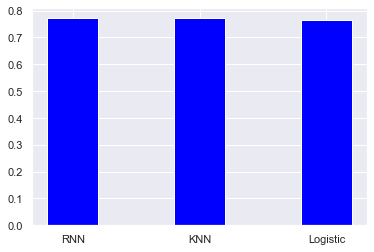

In [303]:
Models=["RNN","KNN","Logistic"]
Accuracies=[rfaccuracy,knaccuracy,lgaccuracy]
plt.bar(Models,Accuracies,color='blue',width=0.4)
plt.show()

Accuracy of RNN and KNN are the almost same and Logistic regression ranks last.

Now it is time to predict the answers:-

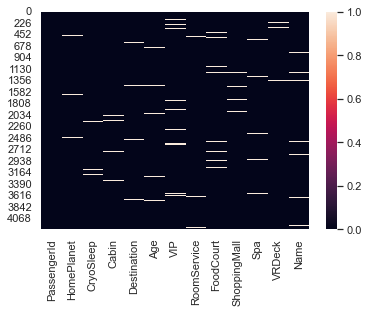

In [310]:
sns.heatmap(y.isnull())
plt.show()

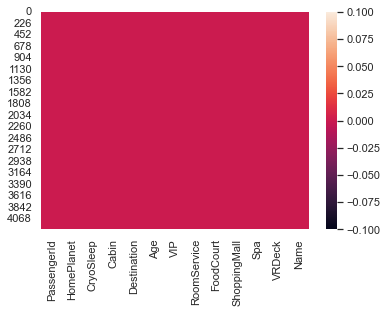

In [311]:
y=y.interpolate(method='linear',limit_direction='forward')
for col in y.columns:
    if y[col].dtype=='object':
        y[col]=y[col].fillna(y[col].mode()[0])

sns.heatmap(y.isnull())
plt.show()

In [312]:
Ids=y['PassengerId']
y=y.drop(['PassengerId','Name'],axis=1)
label_encoder=preprocessing.LabelEncoder()
y['Cabin']=label_encoder.fit_transform(y['Cabin'])
y=pd.get_dummies(y,columns=['HomePlanet','CryoSleep','Destination','VIP'])
y.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,2784,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,1867,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,257,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0
3,259,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0
4,1940,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0


In [313]:
dataset=np.array(y)

In [314]:
prediction=rf.predict(dataset)
print(prediction)

[0 0 1 ... 1 1 1]


In [316]:
answers=pd.DataFrame({'PassengerId' : Ids,'Transported' : prediction})
answers.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [317]:
answers['Transported']=answers['Transported'].apply(lambda x:True if x==1 else False)


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [318]:
answers

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
